# 2016년 가장 입사하고 싶은 기업 1위와 10위(사람인 조사 결과)의 평가 비교

# 잡플래닛 로그인 - (처음만 실행1)

In [1]:
# Selenium의 webdriver를 import하고 FireFox driver를 생성
from selenium import webdriver
driver = webdriver.Firefox()
# 잡플래닛 로그인 화면 이동
driver.get("https://www.jobplanet.co.kr/users/sign_in/")
# 이메일 주소와 비밀번호 입력
user_email = "########@gmail.com"
user_pw = "########"
driver.find_element_by_id("user_email").send_keys(user_email)
driver.find_element_by_id("user_password").send_keys(user_pw)
# 로그인 버튼 클릭
btnLogin = driver.find_element_by_name("commit")
btnLogin.click()

# 리뷰 데이터 가져와서 파일로 저장하는 함수 - (처음만 실행2)

In [6]:
def web_scraping(base_url, page_count, file_name):
    comment = ""
    merit = ""
    disadvantages = ""

    # Page 수 만큼 반복
    for page in range(1, page_count):
        page_url = base_url + '?page=&page={}'.format(page)
        driver.get(page_url)
        review_elements = driver.find_elements_by_xpath("//section[@data-content_type='review']")

        # 이 페이지에 있는 리뷰의 개수
        reviewCount = len(review_elements)    

        # 리뷰의 수 만큼 반복
        for index in range(1, reviewCount):
            review = driver.find_element_by_xpath("//section[@data-content_type='review'][{}]".format(index))
            # 한줄 코멘트
            comment += review.find_element_by_xpath(".//h2[starts-with(@class, 'us_label ')]").text
            # 장점
            merit += review.find_element_by_xpath(".//dd[@class='df1'][1]").text
            # 단점
            disadvantages += review.find_element_by_xpath(".//dd[@class='df1'][2]").text

    # 코멘트 파일에 쓰기
    with open('{}_comment.txt'.format(file_name), 'w', newline='') as f:
        f.write(comment)
    # 장점 파일에 쓰기
    with open('{}_merit.txt'.format(file_name), 'w', newline='') as f:
        f.write(merit)
    # 단점 파일에 쓰기
    with open('{}_disadvantages.txt'.format(file_name), 'w', newline='') as f:
        f.write(disadvantages)

# 기업의 리뷰 URL 정의 및 함수 호출 - (처음만 실행3)

In [8]:
# 1위 현대자동차 리뷰 URL
hyundai_url = "https://www.jobplanet.co.kr/companies/1289/reviews/현대자동차"
web_scraping(hyundai_url, 94, "hyundai")

# 10위 LG전자 리뷰 URL
lg_url = "https://www.jobplanet.co.kr/companies/19514/reviews/엘지전자"
web_scraping(lg_url, 94, "lg")

# 파일 읽기 - (여기서부터 시작)

In [1]:
hyundai_comment = []
hyundai_merit = []
hyundai_disadvantages = []
lg_comment = []
lg_merit = []
lg_disadvantages = []

# 현대자동차 한줄 코멘트
with open('hyundai_comment.txt', 'r', encoding='CP949') as f:
    hyundai_comment = f.read()
# 현대자동차 장점
with open('hyundai_merit.txt', 'r', encoding='CP949') as f:
    hyundai_merit = f.read()
# 현대자동차 단점
with open('hyundai_disadvantages.txt', 'r', encoding='CP949') as f:
    hyundai_disadvantages = f.read()
    
# LG 한줄 코멘트
with open('lg_comment.txt', 'r', encoding='CP949') as f:
    lg_comment = f.read()
# LG 장점
with open('lg_merit.txt', 'r', encoding='CP949') as f:
    lg_merit = f.read()
# LG 단점
with open('lg_disadvantages.txt', 'r', encoding='CP949') as f:
    lg_disadvantages = f.read()

# 형태소 분석

★★★★★★★★★★현대자동차 장점 Word Cloud★★★★★★★★★★


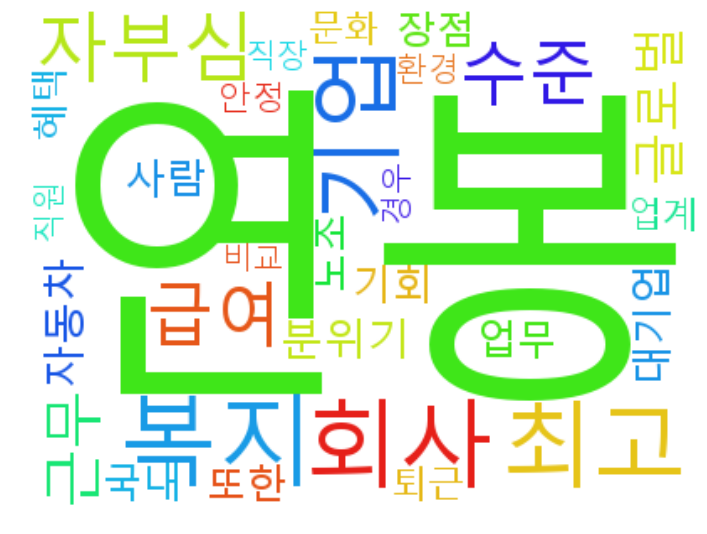

☆☆☆☆☆☆☆☆☆☆현대자동차 단점 Word Cloud☆☆☆☆☆☆☆☆☆☆


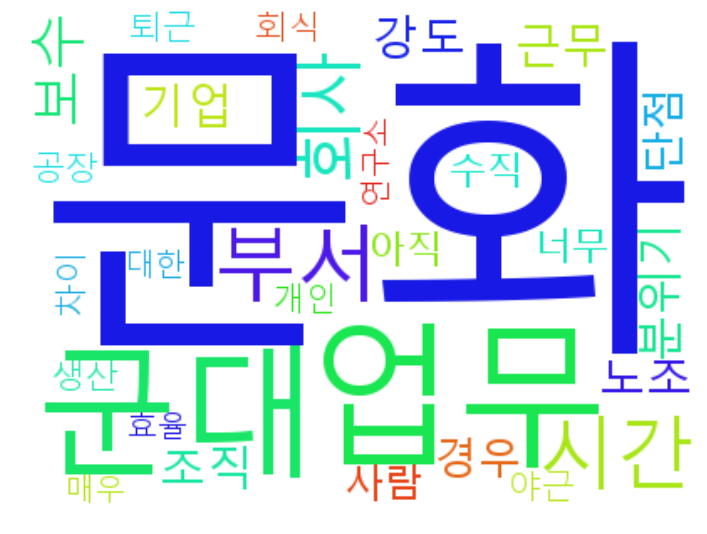

★★★★★★★★★★LG전자 장점 Word Cloud★★★★★★★★★★


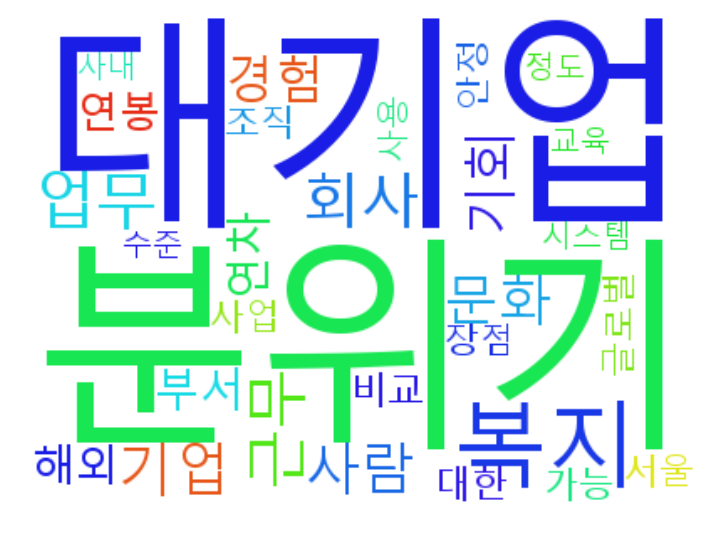

☆☆☆☆☆☆☆☆☆☆LG전자 단점 Word Cloud☆☆☆☆☆☆☆☆☆☆


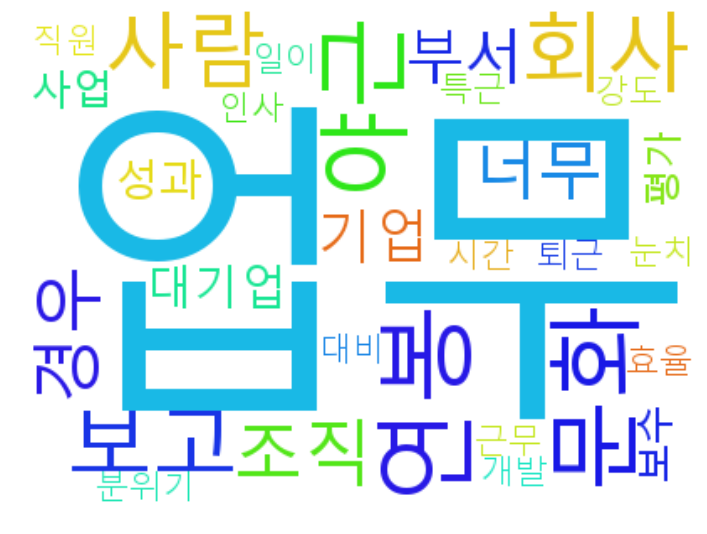

In [158]:
from collections import Counter
from konlpy.tag import Twitter
from konlpy.utils import pprint
from wordcloud import WordCloud
from matplotlib import pyplot

tagger = Twitter()

# 한글자 제거 함수
def get_word(doc):
    nouns = tagger.nouns(doc)    
    return [noun for noun in nouns if len(noun) > 1]

# 그래프를 라인안에 표시
%matplotlib inline

# 워드 클라우드 그리는 함수
def draw_word_cloud(doc):
    word_count = Counter(get_word(doc))
    wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
    cloud = wc.generate_from_frequencies(word_count.most_common(30))
    pyplot.figure(figsize=(12, 9))
    pyplot.imshow(cloud)
    pyplot.axis("off")
    pyplot.show()

# =====워드클라우드 그리기======
# 현대자동차 장점 Word Cloud
print("★★★★★★★★★★현대자동차 장점 Word Cloud★★★★★★★★★★")
draw_word_cloud(hyundai_merit)
# 현대자동차 단점 Word Cloud
print("☆☆☆☆☆☆☆☆☆☆현대자동차 단점 Word Cloud☆☆☆☆☆☆☆☆☆☆")
draw_word_cloud(hyundai_disadvantages)

# LG전자 장점 Word Cloud
print("★★★★★★★★★★LG전자 장점 Word Cloud★★★★★★★★★★")
draw_word_cloud(lg_merit)
# LG전자 단점 Word Cloud
print("☆☆☆☆☆☆☆☆☆☆LG전자 단점 Word Cloud☆☆☆☆☆☆☆☆☆☆")
draw_word_cloud(lg_disadvantages)

# 긍정, 부정, 중립 단어사전 만들기

In [152]:
# 긍정, 부정 단어 리스트 만드는 함수
def create_word_list(doc):
    word_count = Counter(get_word(doc))
    temp_list = []
    for i in word_count.most_common(30):
        temp_list.append(i[0])
    return temp_list

# 중립 단어 리스트 만드는 함수
def create_neutral_word_list(pos_list, neg_list):
    temp_list = []
    for p_word in pos_list:
        for n_word in neg_list:
            if p_word == n_word:
                temp_list.append(p_word)
    return temp_list

# 긍정, 부정 단어 리스트에서 중립 단어 제거 함수
def remove_neutral_word(pos_list, neg_list, neu_list):
    for word in neu_list:
        for p_word in pos_list:
            if word == p_word:
                pos_list.remove(p_word)
        for n_word in neg_list:
            if word == n_word:
                neg_list.remove(n_word)
    return pos_list, neg_list

h_list_positive = create_word_list(hyundai_merit)
h_list_negative = create_word_list(hyundai_disadvantages)
h_list_neutral = create_neutral_word_list(h_list_positive, h_list_negative)
h_list_positive, h_list_negative = remove_neutral_word(h_list_positive, h_list_negative, h_list_neutral)

lg_list_positive = create_word_list(lg_merit)
lg_list_negative = create_word_list(lg_disadvantages)
lg_list_neutral = create_neutral_word_list(lg_list_positive, lg_list_negative)
lg_list_positive, lg_list_negative = remove_neutral_word(lg_list_positive, lg_list_negative, lg_list_neutral)

# 한줄 코멘트 분석

In [156]:
# 코멘트 분석하는 함수
def word_count(comment_list, word_list):
    count = 0
    for comment in comment_list:
        for word in word_list:
            if comment == word:
                count += 1
                break
    return count

# 현대자동차 한줄 코멘트 리스트 만들기
h_comment_list = []
for word in get_word(hyundai_comment):
    h_comment_list.append(word)

print("=====현대자동차 한줄 코멘트 분석 결과=====")
print("긍정 : " + str(word_count(h_comment_list, h_list_positive)))
print("부정 : " + str(word_count(h_comment_list, h_list_negative)))
print("중립 : " + str(word_count(h_comment_list, h_list_neutral)))

# LG전자 한줄 코멘트 리스트 만들기
lg_comment_list = []
for word in get_word(lg_comment):
    lg_comment_list.append(word)
    
print("=====LG전자 한줄 코멘트 분석 결과=====")
print("긍정 : " + str(word_count(lg_comment_list, lg_list_positive)))
print("부정 : " + str(word_count(lg_comment_list, lg_list_negative)))
print("중립 : " + str(word_count(lg_comment_list, lg_list_neutral)))

현대자동차 한줄 코멘트 분석 결과
긍정 : 562
부정 : 177
중립 : 365
LG전자 한줄 코멘트 분석 결과
긍정 : 229
부정 : 156
중립 : 641
